# Assignment-02: Covid-19 Data Analysis using Python

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#processing">Data Pre-Processing</a></li>
<li><a href="#eda">Data Analysis and Visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Project Overview**
>For this assignment, I am using Covid-19 data from <a href="https://www.worldometers.info/coronavirus/">Worldometer: Covid-19 Data</a>. This data set contains information about Covid-19 from all over the world.

#### Assignment-02 Main Objectives
>***Find the***
> 1. Country with largest and lowest total cases
> 2. Country with largest and lowest total Active cases 
> 3. Country which has most and least total deaths
> 4. Country with most and least total recovered
> 5. Country with most Average Cases

## Importing Necessasry Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id = "processing"></a>
## Data Pre-Processing
For the analysis, we will consider the relevant data only that can help to fullfill our objectives.

### Load the Data

In [2]:
covid_data = pd.read_excel('Covid_data.xlsx')

### Printing first five (5) rows with definedv columns of Covid-19 database

In [3]:
covid_data.head()

,CountryID,CountryName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Unnamed: 14
0,NaN,World,683583861,57255.0,6828722.0,207.0,656530262.0,71751.0,20224877.0,40024.0,87697.0,876.1,NaN,NaN,NaN
1,1.0,USA,106122212,1561.0,1153983.0,11.0,103841395.0,2669.0,1126834.0,2062.0,316967.0,3447.0,1.172206e+09,3501158.0,3.348053e+08
2,2.0,India,44709676,NaN,530848.0,NaN,44166925.0,NaN,11903.0,NaN,31785.0,377.0,9.211613e+08,654870.0,1.406632e+09
3,3.0,France,39782589,10885.0,165609.0,36.0,39473539.0,NaN,143441.0,869.0,606585.0,2525.0,2.714902e+08,4139547.0,6.558452e+07
4,4.0,Germany,38343472,NaN,170627.0,NaN,38064200.0,12500.0,108645.0,NaN,457103.0,2034.0,1.223324e+08,1458359.0,8.388360e+07


### Observation from the data
>> 1. Data type is different for different columns. However, for this analysis we need same data type (unit)
>> 2. There are some unnecessary columns in the dataset which we don't need to solve the proposed objectives

### Data Cleaning 

> **Date Cleaning process**
>
> 1. We need to remove unused column such as CountryID, Tot Cases/1M pop, Deaths/1M pop etc.
> 2. Removing the duplicacy in the rows(if any).
> 3. Replacing NaN with zero.
> 4. Change the format (type) of the data.

### Remove unused column

In [4]:
# Creating a list of column to be deleted
del_col = ['CountryID','TotCases/1M pop','Deaths/1M pop','Tests/1M pop','Unnamed: 14']

# Deleting the columns
covid_data = covid_data.drop(del_col, 1)

#Previwing the new dataset
covid_data.head()

C:\Users\ahmri\AppData\Local\Temp\ipykernel_3240\839427411.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  covid_data = covid_data.drop(del_col, 1)


,CountryName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,TotalTests
0,World,683583861,57255.0,6828722.0,207.0,656530262.0,71751.0,20224877.0,40024.0,NaN
1,USA,106122212,1561.0,1153983.0,11.0,103841395.0,2669.0,1126834.0,2062.0,1.172206e+09
2,India,44709676,NaN,530848.0,NaN,44166925.0,NaN,11903.0,NaN,9.211613e+08
3,France,39782589,10885.0,165609.0,36.0,39473539.0,NaN,143441.0,869.0,2.714902e+08
4,Germany,38343472,NaN,170627.0,NaN,38064200.0,12500.0,108645.0,NaN,1.223324e+08


### Removing the duplicacy

In [5]:
rows, col = covid_data.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 231 total entries of movies and 10 no.of columns in it.


In [6]:
covid_data.drop_duplicates(keep ='first', inplace=True)
rows, col = covid_data.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 231 total entries of movies and 10 no.of columns in it.


### Replacing NaN with zero.

In [7]:
# Replacing NaN with zero.
covid_data = covid_data.fillna(0)
covid_data.head()

,CountryName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,TotalTests
0,World,683583861,57255.0,6828722.0,207.0,656530262.0,71751.0,20224877.0,40024.0,0.000000e+00
1,USA,106122212,1561.0,1153983.0,11.0,103841395.0,2669.0,1126834.0,2062.0,1.172206e+09
2,India,44709676,0.0,530848.0,0.0,44166925.0,0.0,11903.0,0.0,9.211613e+08
3,France,39782589,10885.0,165609.0,36.0,39473539.0,0.0,143441.0,869.0,2.714902e+08
4,Germany,38343472,0.0,170627.0,0.0,38064200.0,12500.0,108645.0,0.0,1.223324e+08


### Change the format (type) of the data

In [8]:
#printing the data type of the data set
covid_data.dtypes

CountryName        object
TotalCases          int64
NewCases          float64
TotalDeaths       float64
NewDeaths         float64
TotalRecovered    float64
NewRecovered      float64
ActiveCases       float64
Critical          float64
TotalTests        float64
dtype: object

In [9]:
#change_col = ['CountryID','TotCases/1M pop','Deaths/1M pop','Tests/1M pop','Unnamed: 14']
covid_data.iloc[:,1:].astype('int64')

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,TotalTests
0,683583861,57255,6828722,207,656530262,71751,20224877,40024,0
1,106122212,1561,1153983,11,103841395,2669,1126834,2062,1172206249
2,44709676,0,530848,0,44166925,0,11903,0,921161295
3,39782589,10885,165609,36,39473539,0,143441,869,271490188
4,38343472,0,170627,0,38064200,12500,108645,0,122332384
...,...,...,...,...,...,...,...,...,...
227,712,0,13,0,699,0,0,0,0
228,29,0,0,0,29,0,0,0,0
229,10,0,1,0,9,0,0,0,0
230,9,0,2,0,7,0,0,0,0


In [10]:
covid_data.dtypes

CountryName        object
TotalCases          int64
NewCases          float64
TotalDeaths       float64
NewDeaths         float64
TotalRecovered    float64
NewRecovered      float64
ActiveCases       float64
Critical          float64
TotalTests        float64
dtype: object

In [11]:
covid_data.drop(index=covid_data.index[0], axis=0, inplace=True)

In [12]:
covid_data.head()

,CountryName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,TotalTests
1,USA,106122212,1561.0,1153983.0,11.0,103841395.0,2669.0,1126834.0,2062.0,1.172206e+09
2,India,44709676,0.0,530848.0,0.0,44166925.0,0.0,11903.0,0.0,9.211613e+08
3,France,39782589,10885.0,165609.0,36.0,39473539.0,0.0,143441.0,869.0,2.714902e+08
4,Germany,38343472,0.0,170627.0,0.0,38064200.0,12500.0,108645.0,0.0,1.223324e+08
5,Brazil,37258663,0.0,700239.0,0.0,36249161.0,0.0,309263.0,0.0,6.377617e+07


### Data Analysis

#### 1. Country with largest and lowest total cases

In [13]:
# Find the country with the largest total cases and its value
largest_country = covid_data.loc[covid_data['TotalCases'] == covid_data['TotalCases'].max()]
largest_country_name = largest_country['CountryName'].iloc[0]
largest_country_cases = largest_country['TotalCases'].iloc[0]
print(f"The country with the largest total cases is {largest_country_name} with {largest_country_cases} total cases.")


The country with the largest total cases is USA with 106122212 total cases.


In [14]:
# Find the country with the lowest total cases and its value
lowest_country = covid_data.loc[covid_data['TotalCases'] == covid_data['TotalCases'].min()]
lowest_country_name = lowest_country['CountryName'].iloc[0]
lowest_country_cases = lowest_country['TotalCases'].iloc[0]

# Print the results
print(f"The country with the lowest total cases is {lowest_country_name} with {lowest_country_cases} total cases.")

The country with the lowest total cases is Tokelau with 5 total cases.


### 2. Country with largest and lowest total Active cases

In [15]:
# Find the country with the largest total active cases and its value
largest_country = covid_data.loc[covid_data['ActiveCases'] == covid_data['ActiveCases'].max()]
largest_country_name = largest_country['CountryName'].iloc[0]
largest_country_cases = largest_country['ActiveCases'].iloc[0]
print(f"The country with the largest total active cases is {largest_country_name} with {largest_country_cases} total active cases.")


The country with the largest total active cases is Japan with 11650580.0 total active cases.


In [16]:
# Find the country with the lowest total active cases and its value
lowest_country = covid_data.loc[covid_data['ActiveCases'] == covid_data['ActiveCases'].min()]
lowest_country_name = lowest_country['CountryName'].iloc[0]
lowest_country_cases = lowest_country['TotalCases'].iloc[0]

# Print the results
print(f"The country with the lowest total cases is {lowest_country_name} with {lowest_country_cases} total cases.")

The country with the lowest total cases is New Caledonia with 79912 total cases.


### 3. Country which has most and least total deaths

In [17]:
# Find the country with the largest total deaths and its value
largest_country = covid_data.loc[covid_data['TotalDeaths'] == covid_data['TotalDeaths'].max()]
largest_country_name = largest_country['CountryName'].iloc[0]
largest_country_cases = largest_country['TotalDeaths'].iloc[0]
print(f"The country with the largest Total Deaths is {largest_country_name} with {largest_country_cases} Total Deaths.")


The country with the largest Total Deaths is USA with 1153983.0 Total Deaths.


In [18]:
# Find the country with the lowest total deaths and its value
lowest_country = covid_data.loc[covid_data['TotalDeaths'] == covid_data['TotalDeaths'].min()]
lowest_country_name = lowest_country['CountryName'].iloc[0]
lowest_country_cases = lowest_country['TotalDeaths'].iloc[0]

# Print the results
print(f"The country with the lowest Total Deaths is {lowest_country_name} with {lowest_country_cases} Total Deaths.")

The country with the lowest Total Deaths is Tuvalu with 0.0 Total Deaths.


### 4. Country with most and least total recovered

In [19]:
# Find the country with the largest total deaths and its value
largest_country = covid_data.loc[covid_data['TotalRecovered'] == covid_data['TotalRecovered'].max()]
largest_country_name = largest_country['CountryName'].iloc[0]
largest_country_cases = largest_country['TotalRecovered'].iloc[0]
print(f"The country with the largest Total Recovered is {largest_country_name} with {largest_country_cases} Total Recovered.")


The country with the largest Total Recovered is USA with 103841395.0 Total Recovered.


In [20]:
# Find the country with the lowest total deaths and its value
lowest_country = covid_data.loc[covid_data['TotalRecovered'] == covid_data['TotalRecovered'].min()]
lowest_country_name = lowest_country['CountryName'].iloc[0]
lowest_country_cases = lowest_country['TotalRecovered'].iloc[0]

# Print the results
print(f"The country with the lowest Total Recovered is {lowest_country_name} with {lowest_country_cases} Total Recovered.")

The country with the lowest Total Recovered is Turkey with 0.0 Total Recovered.


### 5. Country with most Average Cases

In [21]:
# Calculate the average number of cases per country
avg_cases = covid_data.groupby('CountryName')['TotalCases'].mean()

most_avg_cases = avg_cases.idxmax()
most_avg_cases_value = avg_cases.loc[most_avg_cases]

# Print the result
print(f"The country with the most average cases is {most_avg_cases} with an average of {most_avg_cases_value:.2f} cases.")

The country with the most average cases is USA with an average of 106122212.00 cases.


## Data Visualization

### Scatter Plot of this Covid Data

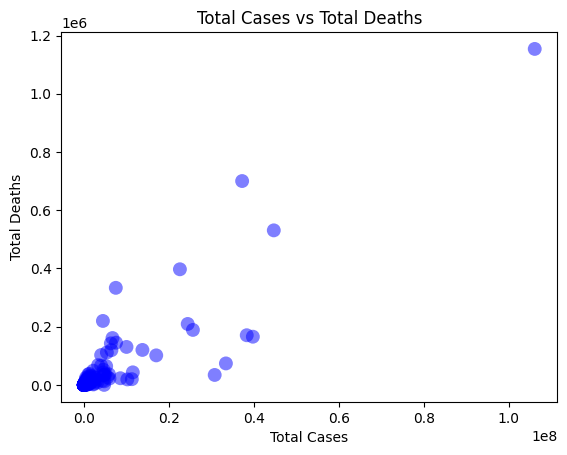

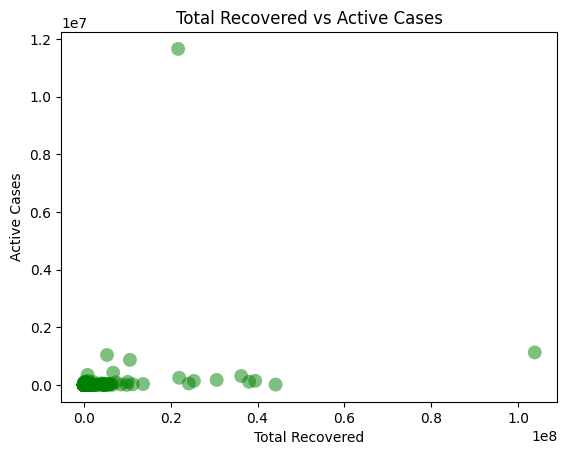

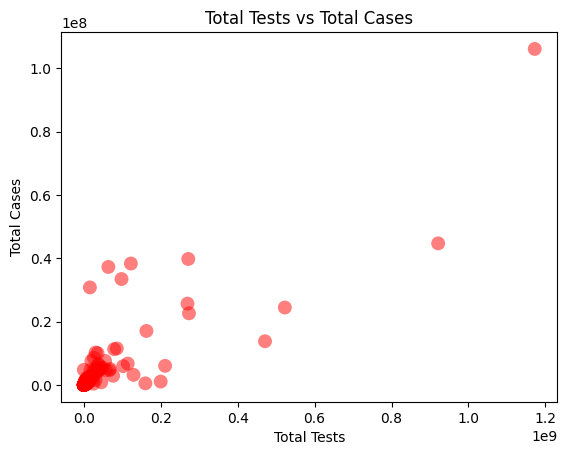

In [22]:
# Create a scatter plot using Matplotlib
fig, ax = plt.subplots()
ax.scatter(covid_data['TotalCases'], covid_data['TotalDeaths'], s=100, alpha=0.5, edgecolors='none', c='blue')
ax.set_xlabel('Total Cases')
ax.set_ylabel('Total Deaths')
ax.set_title('Total Cases vs Total Deaths')
plt.show()

fig, ax = plt.subplots()
ax.scatter(covid_data['TotalRecovered'], covid_data['ActiveCases'], s=100, alpha=0.5, edgecolors='none', c='green')
ax.set_xlabel('Total Recovered')
ax.set_ylabel('Active Cases')
ax.set_title('Total Recovered vs Active Cases')
plt.show()

fig, ax = plt.subplots()
ax.scatter(covid_data['TotalTests'], covid_data['TotalCases'], s=100, alpha=0.5, edgecolors='none', c='red')
ax.set_xlabel('Total Tests')
ax.set_ylabel('Total Cases')
ax.set_title('Total Tests vs Total Cases')
plt.show()

### Top Five (5) Countries based on the total cases

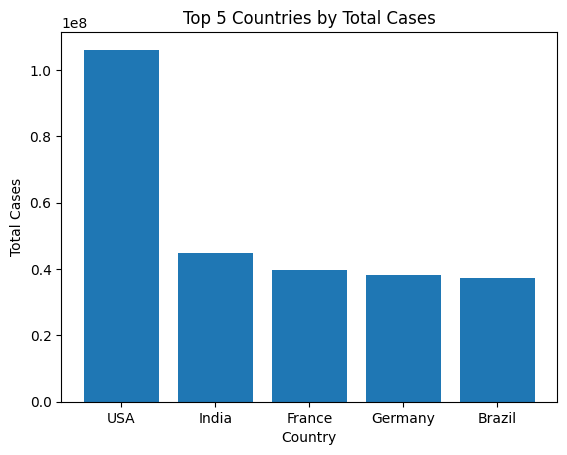

In [23]:
# Sort the dataframe by TotalCases in descending order and select the top 5 countries
top5 = covid_data.sort_values(by='TotalCases', ascending=False).head(5)

# Create a bar graph using Matplotlib
plt.bar(top5['CountryName'], top5['TotalCases'])
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 5 Countries by Total Cases')
plt.show()

## Top Five (5) Countries based on the total deaths

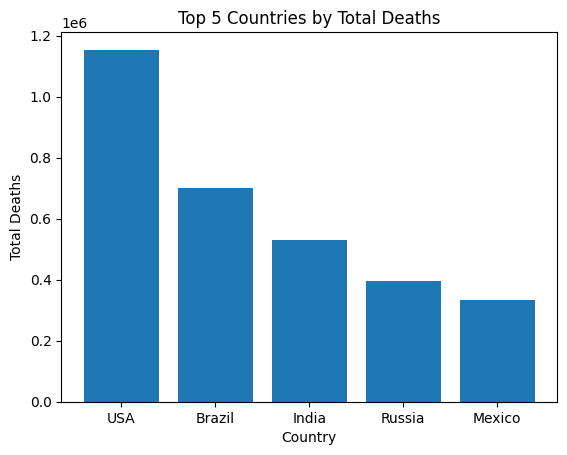

In [24]:
# Sort the dataframe by TotalCases in descending order and select the top 5 countries
top5 = covid_data.sort_values(by='TotalDeaths', ascending=False).head(5)

# Create a bar graph using Matplotlib
plt.bar(top5['CountryName'], top5['TotalDeaths'])
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 5 Countries by Total Deaths')
plt.show()

### Stacked Bar Chart

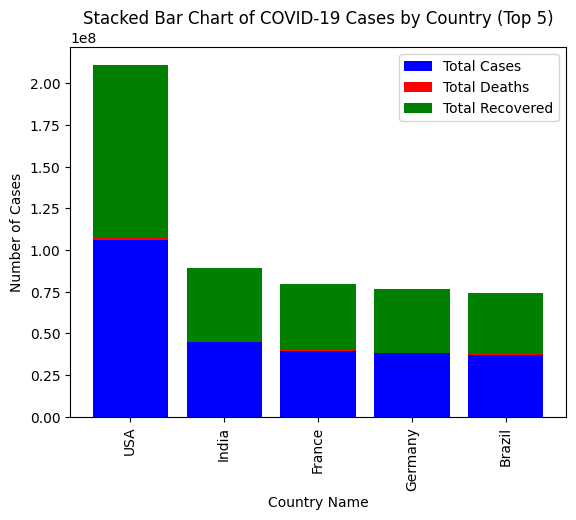

In [25]:
# Sort the dataframe by TotalCases in descending order and select the top 5 rows
top_5 = covid_data.sort_values(by='TotalCases', ascending=False).head(5)

# Create a stacked bar chart using Matplotlib
fig, ax = plt.subplots()
ax.bar(top_5['CountryName'], top_5['TotalCases'], label='Total Cases', color='b')
ax.bar(top_5['CountryName'], top_5['TotalDeaths'], bottom=top_5['TotalCases'], label='Total Deaths', color='r')
ax.bar(top_5['CountryName'], top_5['TotalRecovered'], bottom=top_5['TotalCases']+top_5['TotalDeaths'], label='Total Recovered', color='g')
ax.legend()
ax.set_xlabel('Country Name')
ax.set_ylabel('Number of Cases')
ax.set_title('Stacked Bar Chart of COVID-19 Cases by Country (Top 5)')
plt.xticks(rotation=90)
plt.show()

### Pie Chart

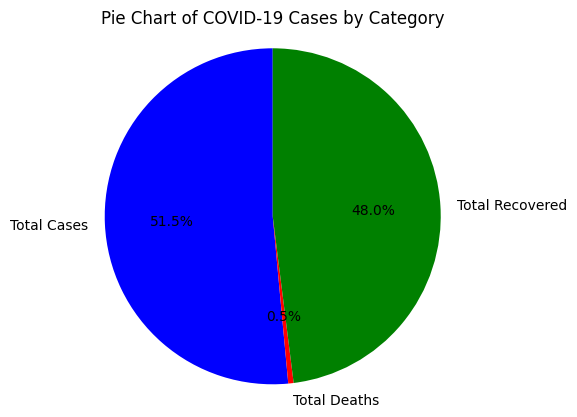

In [26]:
# Calculate the total number of cases for each category (TotalCases, TotalDeaths, TotalRecovered)
total_cases = covid_data['TotalCases'].sum()
total_deaths = covid_data['TotalDeaths'].sum()
total_recovered = covid_data['TotalRecovered'].sum()

# Create a list of the number of cases for each category
cases_list = [total_cases, total_deaths, total_recovered]

# Create a list of labels for each category
labels_list = ['Total Cases', 'Total Deaths', 'Total Recovered']

# Create a list of colors for each category
colors_list = ['b', 'r', 'g']

# Create a pie chart using Matplotlib
fig, ax = plt.subplots()
ax.pie(cases_list, labels=labels_list, colors=colors_list, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Pie Chart of COVID-19 Cases by Category')
plt.show()

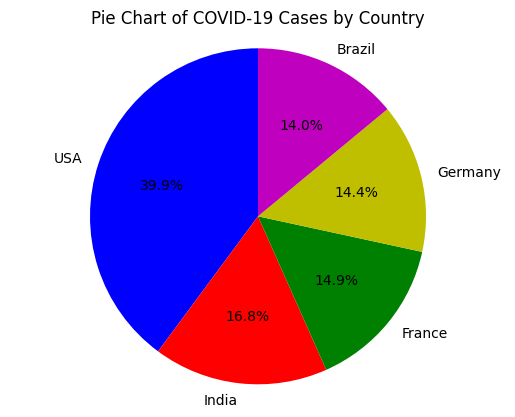

In [27]:
# Select the top 5 countries by TotalCases
top5 = covid_data.sort_values('TotalCases', ascending=False).head(5)

# Create a list of the number of cases for each category for the top 5 countries
cases_list = top5['TotalCases'].tolist()
deaths_list = top5['TotalDeaths'].tolist()
recovered_list = top5['TotalRecovered'].tolist()

# Create a list of labels for each category
labels_list = top5['CountryName'].tolist()

# Create a list of colors for each category
colors_list = ['b', 'r', 'g', 'y', 'm']

# Create a pie chart using Matplotlib
fig, ax = plt.subplots()
ax.pie(cases_list, labels=labels_list, colors=colors_list, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Pie Chart of COVID-19 Cases by Country')
plt.show()